## Problem Statement / Classification: 
### Predict whether the closing price of a stock index will increase or decrease on the next trading day, based on the opening price, highest price, lowest price, adjusted close price, and trading volume for each index?

### Data inspection using panadas

In [33]:
import pandas as pd

Loading the data into a data frame

In [34]:
# loading the data and placing in a dataframe
pricee_s_a = pd.read_csv('../data/raw/prices-split-adjusted.csv')
pricee_s_a

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


Looking at the number of data points for each symbol

In [35]:
#checking the number of datapoints for each symbol
pricee_s_a["symbol"].value_counts()

symbol
VTR     1762
VZ      1762
WAT     1762
WBA     1762
WDC     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

Checking the date data-type & null values

In [36]:
# checking the data summary
pricee_s_a.info()
# Checking for the missing values
print(
    f"Missing values: "
    f"date: {pricee_s_a['date'].isna().sum()}, "
    f"symbol: {pricee_s_a['symbol'].isna().sum()}, "
    f"open: {pricee_s_a['open'].isna().sum()}, "
    f"close: {pricee_s_a['close'].isna().sum()}, "
    f"low: {pricee_s_a['low'].isna().sum()}, "
    f"high: {pricee_s_a['high'].isna().sum()}", 
    f"volume: {pricee_s_a['volume'].isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
Missing values: date: 0, symbol: 0, open: 0, close: 0, low: 0, high: 0 volume: 0


There are no missing values

Cheking the unique stock indexes or symbols.

In [37]:
# Cheking the unique stock indexes or symbols, their number and listing them
unique_sympols = pricee_s_a["symbol"].unique()
len (unique_sympols)

501

In [38]:
unique_sympols.tolist()

['WLTW',
 'A',
 'AAL',
 'AAP',
 'AAPL',
 'ABC',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADS',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AET',
 'AFL',
 'AGN',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALK',
 'ALL',
 'ALXN',
 'AMAT',
 'AME',
 'AMG',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'AN',
 'ANTM',
 'AON',
 'APA',
 'APC',
 'APD',
 'APH',
 'ARNC',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AYI',
 'AZO',
 'BA',
 'BAC',
 'BAX',
 'BBBY',
 'BBT',
 'BBY',
 'BCR',
 'BDX',
 'BEN',
 'BHI',
 'BIIB',
 'BK',
 'BLK',
 'BLL',
 'BMY',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CA',
 'CAG',
 'CAH',
 'CAT',
 'CB',
 'CBG',
 'CBS',
 'CCI',
 'CCL',
 'CELG',
 'CERN',
 'CF',
 'CHD',
 'CHK',
 'CHRW',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COG',
 'COH',
 'COL',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CRM',
 'CSCO',
 'CSX',
 'CTAS',
 'CTL',
 'CTSH',
 'CTXS',
 'CVS',
 'CVX',
 'CXO',
 'D',
 'DAL',
 'DD',
 'DE',
 'DFS',
 'DG',
 'DGX',
 'DHI',
 'DHR',

In [39]:
print(pricee_s_a['date'].head(10))

0    2016-01-05
1    2016-01-06
2    2016-01-07
3    2016-01-08
4    2016-01-11
5    2016-01-12
6    2016-01-13
7    2016-01-14
8    2016-01-15
9    2016-01-19
Name: date, dtype: object


Chekcing the date column

In [40]:
# Converts the 'date' column from string into a Timestamp, we need this for time-series operations
# in this data it has been already done otherwise we could use this line of code "prices['date'] = pd.to_datetime(prices['date'])" I was getting Erros.
print(pricee_s_a['date'].head(10))

0    2016-01-05
1    2016-01-06
2    2016-01-07
3    2016-01-08
4    2016-01-11
5    2016-01-12
6    2016-01-13
7    2016-01-14
8    2016-01-15
9    2016-01-19
Name: date, dtype: object


Sorting the data based on date and symbol and drop any duplicates

In [41]:
#Sorting the data based on symbol and date, and dropping the duplicates if any exist
pricee_s_a = pricee_s_a.sort_values(['symbol','date']).drop_duplicates()

Validity check on the data

In [42]:
# Keeping the valid data only, the logic is if the lowest price is not smaller than or equal to high price, the data is invalid and we drop it
pricee_s_a = pricee_s_a[pricee_s_a['low'] <= pricee_s_a['high']]

In [43]:
pricee_s_a

,date,symbol,open,close,low,high,volume
251,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0
718,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0
1186,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0
1654,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0
2122,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0
...,...,...,...,...,...,...,...
849261,2016-12-23,ZTS,53.200001,53.779999,53.180000,53.779999,1942400.0
849761,2016-12-27,ZTS,53.779999,53.720001,53.650002,54.150002,1345000.0
850261,2016-12-28,ZTS,53.759998,53.439999,53.349998,53.849998,1241900.0
850761,2016-12-29,ZTS,53.470001,53.619999,53.400002,53.779999,1046700.0


Calculating and adding the 'close_lag', 'log-return_1d', 'target_next_day_return' and 'price_up_tomorrow'  values as a new column

In [44]:
# calculating and adding returns values

# first we need to get a-day-before close as a new column, naming it "close_lag1" for each symbol
pricee_s_a['close_lag1'] = pricee_s_a.groupby('symbol')['close'].shift(1)
import numpy as np

# computing the log return
pricee_s_a['log_return_1d'] = np.log(pricee_s_a['close'] / pricee_s_a['close_lag1'])


# For each stock, get tomorrow’s log return as the target
pricee_s_a['target_next_day_return'] = pricee_s_a.groupby('symbol')['log_return_1d'].shift(-1)

# Create a binary classification label (target feature)
pricee_s_a['price_up_tomorrow'] = (pricee_s_a['target_next_day_return'] > 0).astype(int)

Showing the results for one symbol  ‘AAPL’ (top 10 rows)

In [45]:
# showing return for specific symbol
print(pricee_s_a.loc[pricee_s_a['symbol'] == 'AAPL', ['date', 'close', 'close_lag1','log_return_1d', 'target_next_day_return', 'price_up_tomorrow']].head(10))

            date      close  close_lag1  log_return_1d  \
254   2010-01-04  30.572857         NaN            NaN   
721   2010-01-05  30.625713   30.572857       0.001727   
1189  2010-01-06  30.138571   30.625713      -0.016034   
1657  2010-01-07  30.082857   30.138571      -0.001850   
2125  2010-01-08  30.282858   30.082857       0.006626   
2593  2010-01-11  30.015715   30.282858      -0.008861   
3061  2010-01-12  29.674286   30.015715      -0.011440   
3529  2010-01-13  30.092857   29.674286       0.014007   
3997  2010-01-14  29.918571   30.092857      -0.005808   
4465  2010-01-15  29.418571   29.918571      -0.016853   

      target_next_day_return  price_up_tomorrow  
254                 0.001727                  1  
721                -0.016034                  0  
1189               -0.001850                  0  
1657                0.006626                  1  
2125               -0.008861                  0  
2593               -0.011440                  0  
3061       

# EDA (Exploratory Data Analysis)

## Performing eda to understand patterns before modeling

In [46]:
pricee_s_a

,date,symbol,open,close,low,high,volume,close_lag1,log_return_1d,target_next_day_return,price_up_tomorrow
251,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0,NaN,NaN,-0.010922,0
718,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,22.389128,-0.010922,-0.003559,0
1186,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,22.145923,-0.003559,-0.001298,0
1654,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,22.067240,-0.001298,-0.000325,0
2122,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,22.038626,-0.000325,0.000649,1
...,...,...,...,...,...,...,...,...,...,...,...
849261,2016-12-23,ZTS,53.200001,53.779999,53.180000,53.779999,1942400.0,53.259998,0.009716,-0.001116,0
849761,2016-12-27,ZTS,53.779999,53.720001,53.650002,54.150002,1345000.0,53.779999,-0.001116,-0.005226,0
850261,2016-12-28,ZTS,53.759998,53.439999,53.349998,53.849998,1241900.0,53.720001,-0.005226,0.003363,1
850761,2016-12-29,ZTS,53.470001,53.619999,53.400002,53.779999,1046700.0,53.439999,0.003363,-0.001680,0


In [47]:
## Check for Missing / Invalid Data After Lag
# Because of the shift(1) operation, the first entry per symbol will have NaN for close_lag1 and log_return_1d
pricee_s_a.isna().sum()

date                        0
symbol                      0
open                        0
close                       0
low                         0
high                        0
volume                      0
close_lag1                501
log_return_1d             501
target_next_day_return    501
price_up_tomorrow           0
dtype: int64

In [48]:
# Drop those rows containing NaN before modeling:
pricee_s_a = pricee_s_a.dropna(subset=['close_lag1', 'target_next_day_return'])

In [49]:
# Checking if there are no more NaN values in the data
pricee_s_a.isna().sum()

date                      0
symbol                    0
open                      0
close                     0
low                       0
high                      0
volume                    0
close_lag1                0
log_return_1d             0
target_next_day_return    0
price_up_tomorrow         0
dtype: int64

In [50]:
## Check count for each index, why we have only one year of data or so, group by

pricee_s_a['symbol'].value_counts()

symbol
ZION    1760
A       1760
AAL     1760
AAP     1760
AAPL    1760
        ... 
PYPL     376
HPE      302
CSRA     282
WLTW     249
FTV      124
Name: count, Length: 501, dtype: int64

In [51]:
## Sorting data with respect to symbol

pricee_s_a = pricee_s_a.sort_values(['symbol', 'date']).reset_index(drop=True)

In [52]:
## Printing data

pricee_s_a

,date,symbol,open,close,low,high,volume,close_lag1,log_return_1d,target_next_day_return,price_up_tomorrow
0,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,22.389128,-0.010922,-0.003559,0
1,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,22.145923,-0.003559,-0.001298,0
2,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,22.067240,-0.001298,-0.000325,0
3,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,22.038626,-0.000325,0.000649,1
4,2010-01-11,A,22.088697,22.045780,21.938484,22.210300,4781500.0,22.031474,0.000649,-0.012078,0
...,...,...,...,...,...,...,...,...,...,...,...
850257,2016-12-22,ZTS,52.669998,53.259998,52.669998,53.369999,1515800.0,53.119999,0.002632,0.009716,1
850258,2016-12-23,ZTS,53.200001,53.779999,53.180000,53.779999,1942400.0,53.259998,0.009716,-0.001116,0
850259,2016-12-27,ZTS,53.779999,53.720001,53.650002,54.150002,1345000.0,53.779999,-0.001116,-0.005226,0
850260,2016-12-28,ZTS,53.759998,53.439999,53.349998,53.849998,1241900.0,53.720001,-0.005226,0.003363,1


### Finding rows for zero trading volume

In [53]:
# Find rows with zero trading volume
zero_volume_days = pricee_s_a[pricee_s_a['volume'] == 0]

# Display summary
print(f"Number of zero-volume records: {len(zero_volume_days)}")
print(zero_volume_days[['date', 'symbol', 'volume', 'close', 'open']])


Number of zero-volume records: 21
              date symbol  volume       close        open
133548  2016-01-15     CB     0.0  111.019997  111.019997
151892  2010-01-06   CHTR     0.0   35.000000   35.000000
151919  2010-02-16   CHTR     0.0   29.740000   29.740000
151920  2010-02-17   CHTR     0.0   29.740000   29.740000
151922  2010-02-19   CHTR     0.0   29.700001   29.700001
151924  2010-02-23   CHTR     0.0   29.700001   29.700001
151925  2010-02-24   CHTR     0.0   29.700001   29.700001
151955  2010-04-08   CHTR     0.0   34.549999   34.549999
151958  2010-04-13   CHTR     0.0   35.000000   35.000000
151963  2010-04-20   CHTR     0.0   36.009998   36.009998
151980  2010-05-13   CHTR     0.0   38.000000   38.000000
151999  2010-06-10   CHTR     0.0   34.520000   34.520000
152010  2010-06-25   CHTR     0.0   35.599998   35.599998
152043  2010-08-12   CHTR     0.0   36.200001   36.200001
152047  2010-08-18   CHTR     0.0   35.049999   35.049999
152055  2010-08-30   CHTR     0.0   33

For 21 rows, 'volume' is zero which means that 'open' & 'close' values are same for such entries which make sense.

### Distribution of Daily Log Returns (Top 10 Symbols by Avg Return)

Top 10 symbols with highest average daily log return:
['NFLX', 'REGN', 'ULTA', 'FB', 'URI', 'ALK', 'AAL', 'STZ', 'AVGO', 'CHTR']


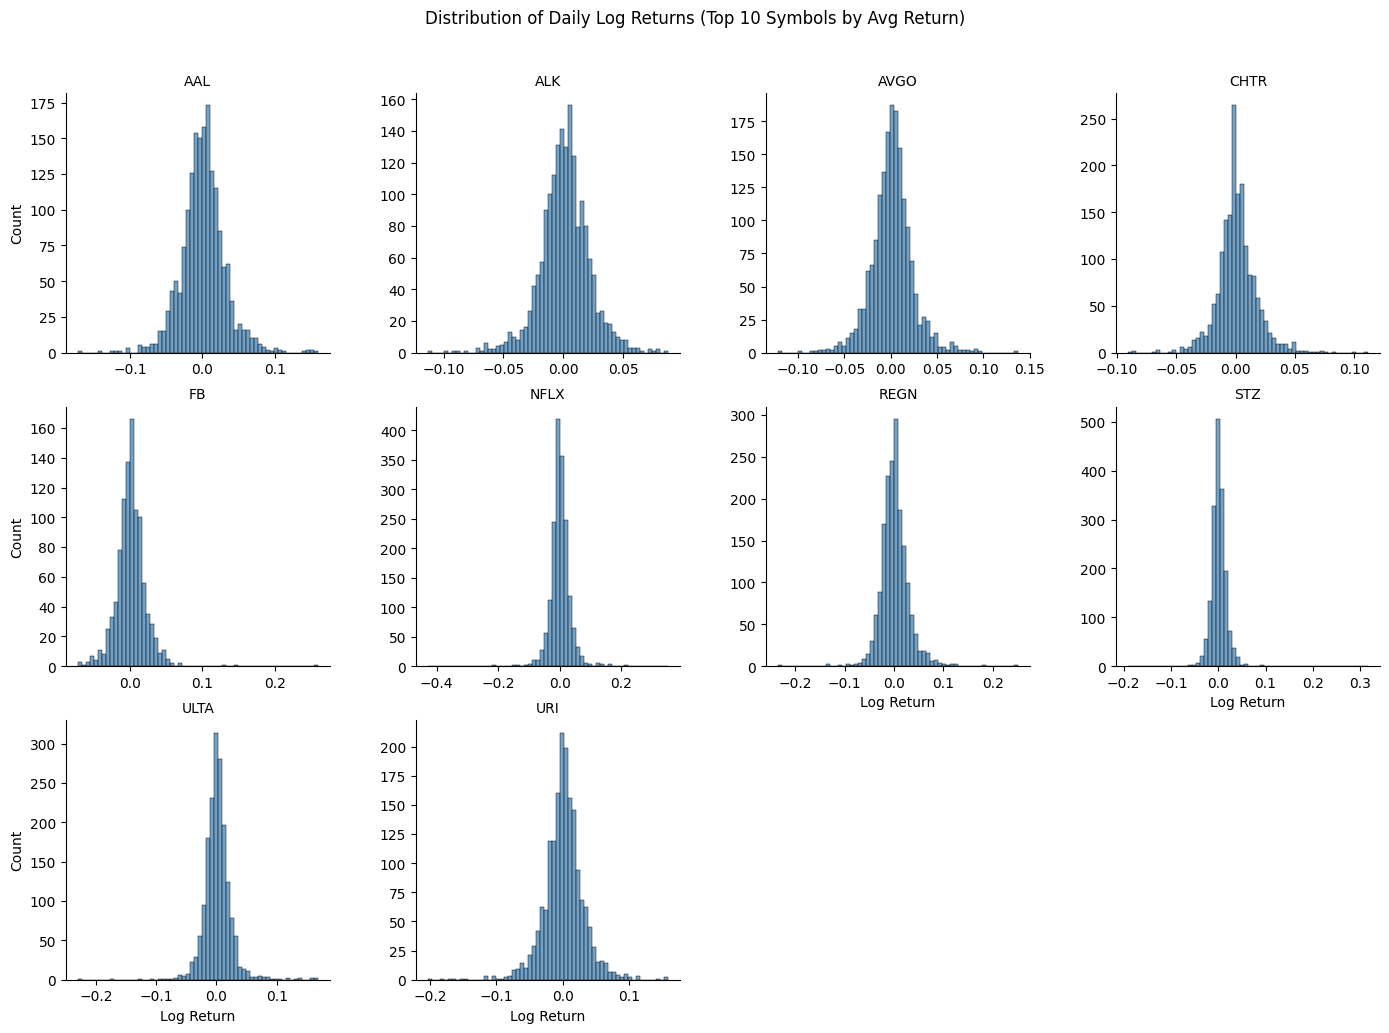

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find top 10 symbols with highest average daily log return
top_symbols = (
    pricee_s_a.groupby('symbol')['log_return_1d']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Print the top 10 symbols
print("Top 10 symbols with highest average daily log return:")
print(top_symbols.tolist())

# Filter the dataset to include only those symbols
subset = pricee_s_a[pricee_s_a['symbol'].isin(top_symbols)]

# Plot distribution of daily log returns for each symbol
g = sns.FacetGrid(subset, col="symbol", col_wrap=4, height=3.5, sharex=False, sharey=False)
g.map(sns.histplot, "log_return_1d", bins=60, color="steelblue")
g.set_titles("{col_name}")
g.set_axis_labels("Log Return", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Daily Log Returns (Top 10 Symbols by Avg Return)")
plt.show()


### Distribution of Daily Log Returns (Overall)

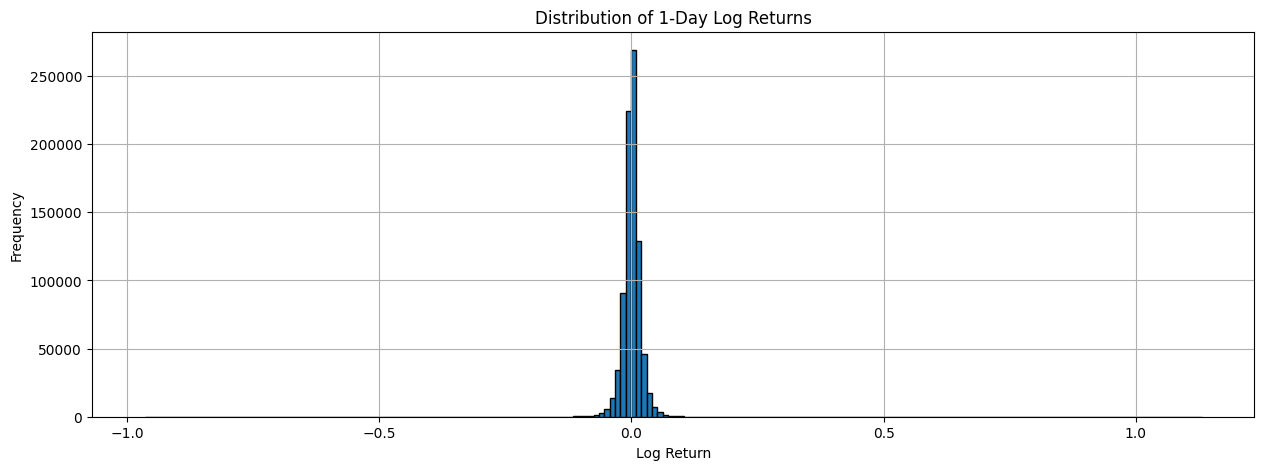

In [55]:
# Distribution of Daily Log Returns (Overall)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
pricee_s_a['log_return_1d'].hist(bins=200, edgecolor='black')
plt.title("Distribution of 1-Day Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

### Checking skewness and kurtosis:




In [56]:
# Interpreting skewness and kurtosis

pricee_s_a['log_return_1d'].skew(), pricee_s_a['log_return_1d'].kurtosis()


(np.float64(-0.19764953041422903), np.float64(73.15364048971477))

#### Interpreting skewness and kurtosis is an important part of EDA. 
Skewness measures the asymmetry i.e. how much data contain extreme values (0 means normal distribution, negative means long tail on left side, positive means long tail on right side).

Kurtosis measures the "tailedness" i.e. how heavy or light the tails are compared to a normal distribution (3 means norml distribution, >3 means heavy tails or outliers, <3 means light tails or less extremem values).

Based on Skewness value "-0.197", data is slightly left-skewed, but very close to 0 so there is no strong bias towrds gain or losses.

Based on Kurtosis value "73.1", return distribution contain many extreme spikes/outliers where large jumps occur in financial data.

## Feature Correlation Matrix (comparing how each features relates to the others).

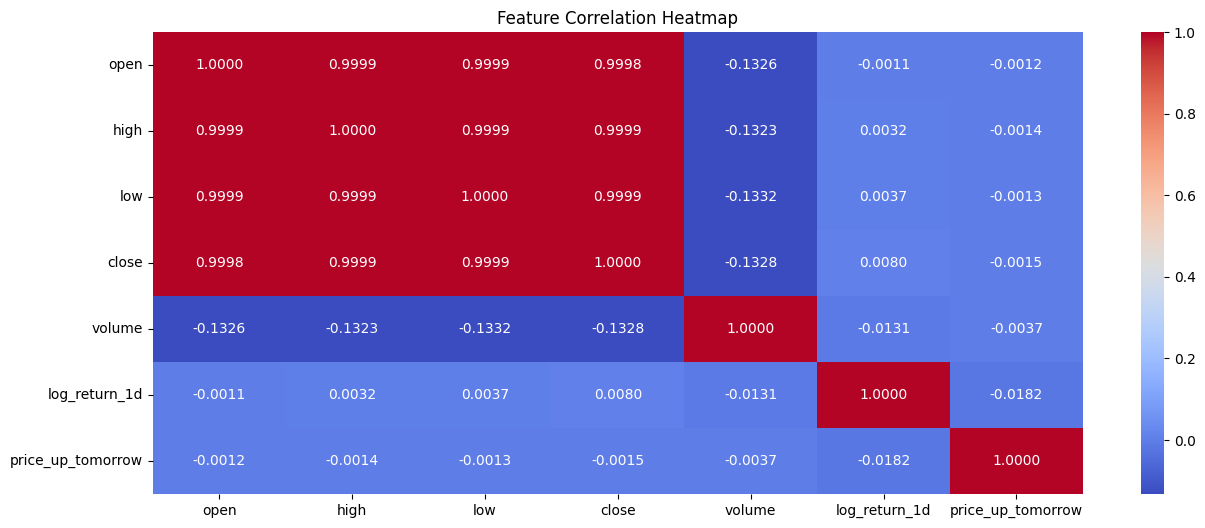

In [57]:
## Correlation Analysis

corr = pricee_s_a[['open', 'high', 'low', 'close', 'volume', 'log_return_1d', 'price_up_tomorrow']].corr()
import seaborn as sns

plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Key observations:
Red (closer to 1): Strong positive correlation — when one feature increases, the other tends to increase. Applies to columns 'open', 'high', 'low', 'close'  that shows that price metrics move together during trading.

Blue (closer to -1): Strong negative correlation — when one feature increases, the other tends to decrease.

White or pale colors (around 0): Weak or no correlation. Applies to column 'volume' & 'log_return_1d' which has nearly no relation with other features.

## Pair Plot

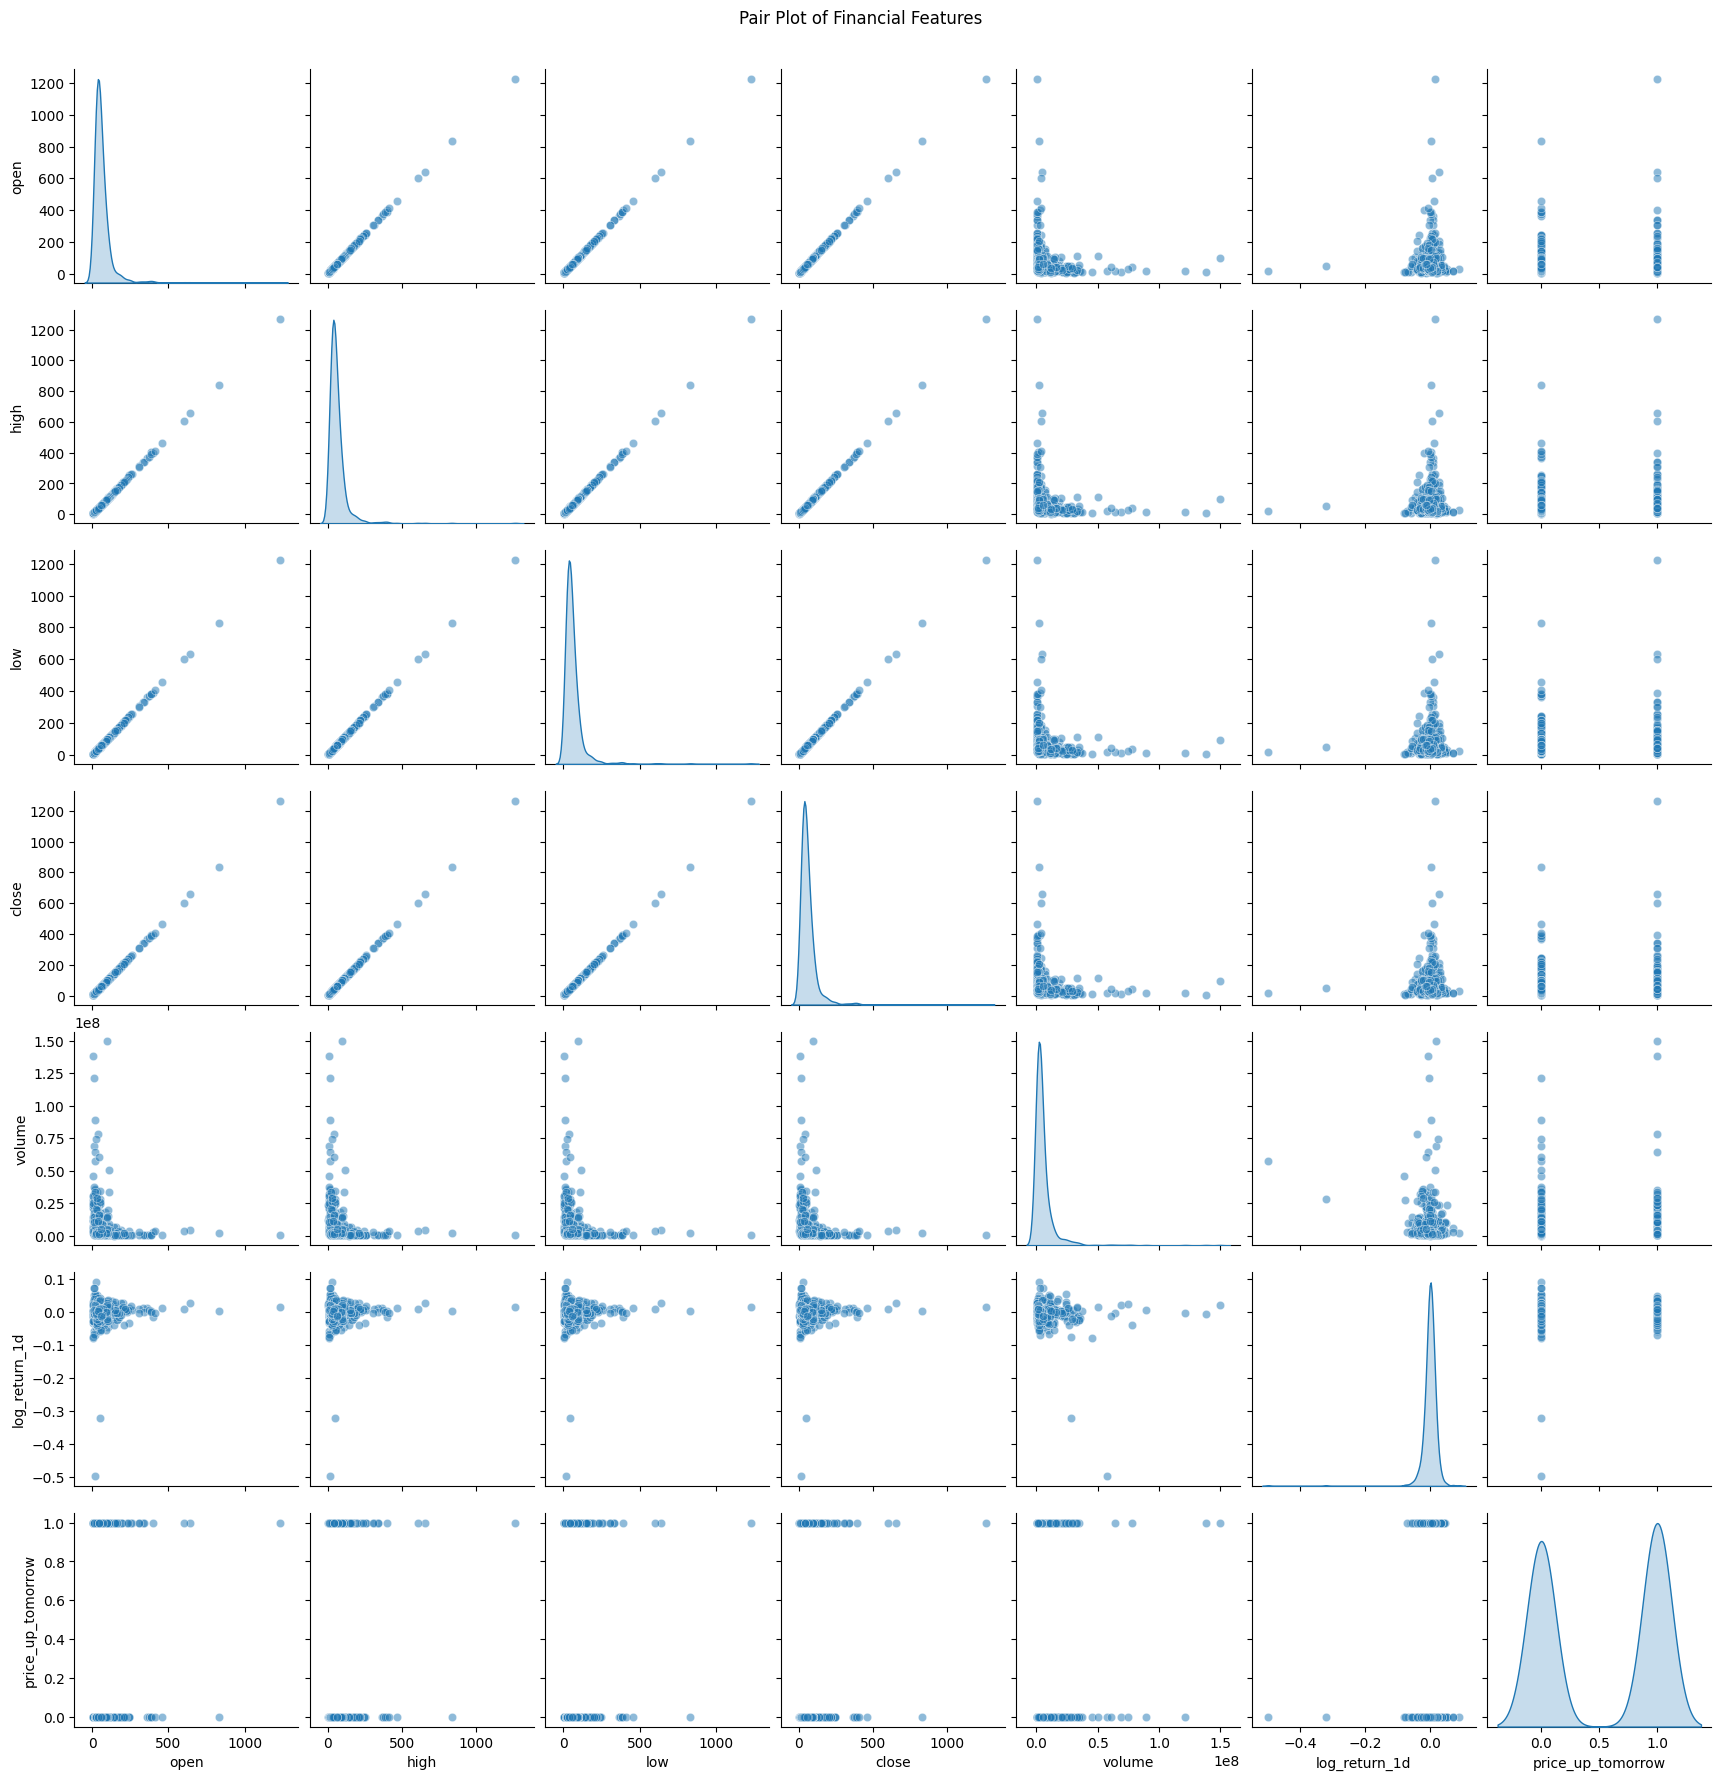

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric features
features = ['open', 'high', 'low', 'close', 'volume', 'log_return_1d', 'price_up_tomorrow']

# Optional: sample to reduce clutter if dataset is large
sampled_data = pricee_s_a[features].sample(n=1000, random_state=42)

# Create pair plot
sns.pairplot(sampled_data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Financial Features", y=1.02)
plt.show()

### Key observations:

Above pair-plot is consistent with what we observed in the correlation matrics

## Single Time Series

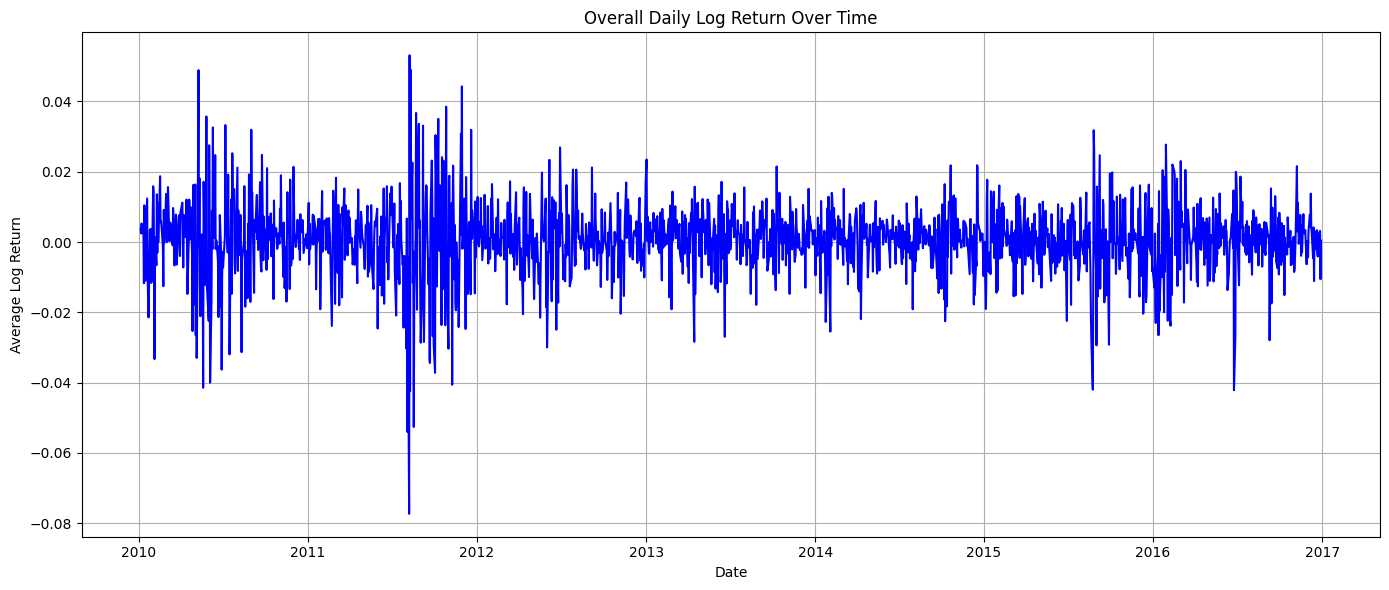

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' is datetime
pricee_s_a['date'] = pd.to_datetime(pricee_s_a['date'])

# Aggregate log return by date (mean across all symbols)
overall_log_return = pricee_s_a.groupby('date')['log_return_1d'].mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(overall_log_return.index, overall_log_return.values, color='blue')
plt.title('Overall Daily Log Return Over Time')
plt.xlabel('Date')
plt.ylabel('Average Log Return')
plt.grid(True)
plt.tight_layout()
plt.show()


### Key observations:

Average log return is close to zero most of the time, which is typical for daily returns.

Extreme drops (like below -0.06) indicate significant negative market events.

Spikes above 0.04 are strong positive days.

### Export processed data

In [60]:
from pathlib import Path
# Define the directory as a Path (does NOT create it yet)
processed_path = Path("../data/processed")
# Create the directory (mkdir returns None, so do NOT overwrite the variable)
processed_path.mkdir(parents=True, exist_ok=True)
# Build the full file path using /
file_path = processed_path / "data_clean.parquet"
# Save parquet using the Path object
pricee_s_a.to_parquet(file_path, index=False)